In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# colocando os parâmetros

mr = 0.5/1000 #em gramas
m = 42.24/1000 #em gramas
R1 = 1/1000 #em metros
R2 = 99/2/1000 #em metros
I = 1/2*(mr*((R1**2)+(R2**2)))
g = 9.8 #metros/segundo**2
peso = m*g #em N
Cd = 0.82
A = (2/100)*(2/100)
p = 1
ang = math.radians(40)
sen = math.sin(ang)
cos = math.cos(ang)
altura = 0.8*math.sin(ang)
Xmax = altura/math.tan(ang) #comprimento no eixo x
R_do_loop = 11/100

print("Altura: ", altura)
print("Xmax: ", Xmax)

Altura:  0.5142300877492314
Xmax:  0.6128355544951825


In [28]:
def Rampa(listaSolucao, t, a, Xmax):
    x = listaSolucao[0]
    y = listaSolucao[1]
    Vx = listaSolucao[2]
    Vy = listaSolucao[3]
    v = math.sqrt(Vx**2 + Vy**2)
    D = 1/2*(p*Cd*A*(v**2))
    N = peso*cos
    fat = (peso*sen-D)/(4 + m*(R2**2)/I)
    D = 0
    dxdt = Vx
    dydt = Vy
    dVxdt = ((N*sen) - (D*cos) - (4*fat*cos))/m
    dVydt = ((N*cos) + (D*sen) + (4*fat*sen))/m - g    
    if x > Xmax:        
        dVxdt = 0
        dVydt = 0        
    return dxdt, dydt, dVxdt, dVydt

In [29]:
delta_t = 1e-4
tempo = np.arange(0,2,delta_t)
CI = [0,altura,0,0]
solucaoRampa = odeint(Rampa, CI, tempo, args=(ang, Xmax))

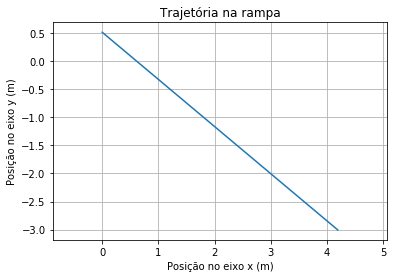

In [30]:
#plotando trajtória
plt.plot(solucaoRampa[:,0], solucaoRampa[:,1])
plt.xlabel('Posição no eixo x (m)')
plt.ylabel('Posição no eixo y (m)')
plt.title('Trajetória na rampa')
plt.axis('equal')
plt.grid(True)
plt.show()

In [31]:
def Loop(listaSolucao, t):
    a = listaSolucao[0]
    w = listaSolucao[1]
    dadt = w
    v = w*R_do_loop
    D = 1/2*(p*Cd*A*(v**2))
    D=0
    #velocidade positiva
    if w > 0:
        fat = (-peso*math.cos(a)-D)/(4 + m*(R2**2)/I)       
        dwdt = (-peso*math.cos(a) - D - 4*fat)/(m*R_do_loop)       

    #velocidade negativa
    else:
        fat = (peso*math.cos(a)-D)/(4 + m*(R2**2)/I)
        dwdt = (-peso*math.cos(a) + D + 4*fat)/(m*R_do_loop)
    return dadt, dwdt,v

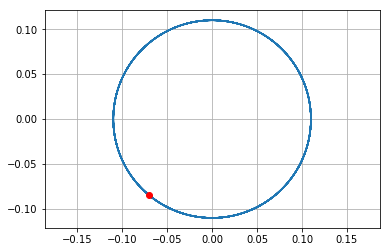

3.1379024498942103


In [34]:
vxf = solucaoRampa[:,2][-1]
vyf = solucaoRampa[:,3][-1]
vf = math.sqrt((vxf**2) + (vyf**2))
a0 = -math.pi/2 - ang
w0 = vf/R_do_loop
CI1 = [a0,w0,vf]
solucaoLoop = odeint(Loop, CI1, tempo)

#lista de todos os alphas no tempo
alphas = solucaoLoop[:,0]

#lista de todos os omegas no tempo
omegas = solucaoLoop[:,1]

vel_ = solucaoLoop[:,2]

#Calculando posição
xloop = [R_do_loop*math.cos(a) for a in alphas]
yloop = [R_do_loop*math.sin(a) for a in alphas]
plt.plot(xloop, yloop)
plt.plot(xloop[0], yloop[0], 'ro')
plt.axis('equal')
plt.grid(True)
plt.show()


print(vf)

In [33]:
for vfl in vel_:
    print(vfl)

3.1379024498942103
3.1382162708431514
3.1385301531221925
3.1388440965292888
3.1391581008301945
3.1394721658935816
3.1397862914814327
3.1401004773709844
3.140414723339472
3.140729029164132
3.141043394622199
3.141357819490911
3.1416723035475016
3.1419868465692087
3.142301448333267
3.142616108616913
3.142930827202145
3.1432456038927663
3.143560438474654
3.143875330730417
3.144190280442664
3.1445052873940047
3.144820351367048
3.145135472144403
3.1454506495086796
3.1457658832424857
3.1460811731284317
3.1463965189491265
3.146711920477094
3.147027377466626
3.1473428896932285
3.147658456933554
3.1479740789642565
3.14828975556199
3.1486054865034077
3.148921271565164
3.1492371105239125
3.1495530031563064
3.149868949239
3.150184948548647
3.1505010005649736
3.1508171056935086
3.1511332633103355
3.1514494731909197
3.15176573511024
3.1520820488427894
3.1523984141625747
3.1527148308431174
3.1530312986574516
3.1533478173781253
3.153664386777202
3.1539810066259744
3.154297676678385
3.1546143966922418
3

3.625630977121608
3.6258857174188166
3.626140511492779
3.6263953595267937
3.6266502617039063
3.62690521820691
3.6271602292183456
3.6274152949204983
3.6276704154953983
3.6279255911248187
3.6281808219902754
3.628436108273025
3.628691450154064
3.62894684781413
3.6292023014337196
3.62945781119333
3.62971337727301
3.6299689998524642
3.630224679111135
3.630480415228196
3.630736208382556
3.6309920587528515
3.6312479665174524
3.631503931854457
3.631759954941692
3.6320160359567106
3.6322721750767935
3.6325283724789452
3.6327846283398957
3.6330409428360957
3.6332973161437208
3.633553748438665
3.633810239896543
3.634066790692689
3.6343234010021535
3.6345800709997045
3.634836800859825
3.6350935907567137
3.6353504408642814
3.635607351356151
3.635864322405658
3.6361213541858475
3.636378446869473
3.6366356006289973
3.6368928156365894
3.6371500920641244
3.6374074300831816
3.6376648298650456
3.637922291580702
3.638179815400839
3.6384374014958447
3.6386950500358073
3.6389527611905126
3.639210535129444
3

4.073269852578174
4.073558521456262
4.073847094703526
4.074135572308707
4.074423954261211
4.074712240551105
4.075000431169115
4.075288526106629
4.075576525355693
4.075864428909015
4.076152236759959
4.0764399489025465
4.076727565331459
4.077015086042032
4.0773025110302585
4.077589840292788
4.077877073826922
4.078164211630619
4.07845125370249
4.078738200041801
4.079025050648467
4.079311805523057
4.079598464666792
4.079885028081542
4.080171495769828
4.08045786773482
4.080744143980336
4.081030324510844
4.081316409331457
4.081602398447937
4.081888291866691
4.082174089594771
4.082459791639875
4.082745398010344
4.0830309087151635
4.083316323763961
4.083601643167008
4.083886866935216
4.084171995080135
4.084457027613961
4.084741964549524
4.085026805900295
4.085311551680384
4.085596201904536
4.0858807565881365
4.0861652157471875
4.086449579397951
4.086733847557509
4.087018020243739
4.087302097475147
4.087586079270874
4.087869965650689
4.0881537566349895
4.088437452244801
4.088721052501778
4.0890

4.6295440144039
4.629864119968102
4.630184197352426
4.630504246290773
4.63082426651731
4.631144257766467
4.631464219772947
4.631784152271722
4.63210405499804
4.632423927687427
4.632743770075683
4.633063581898894
4.633383362893429
4.633703112795942
4.6340228313433744
4.634342518272962
4.634662173322228
4.634981796228998
4.635301386731391
4.635620944567827
4.6359404694770285
4.636259961198024
4.636579419470149
4.636898844033046
4.637218234626672
4.637537590991298
4.637856912867509
4.638176199996211
4.638495452118632
4.63881466897632
4.6391338503111506
4.6394529958653274
4.6397721053813825
4.640091178602182
4.640410215270927
4.640729215131152
4.641048177926735
4.641367103401893
4.641685991301188
4.642004841369524
4.642323653352159
4.642642426994696
4.642961162043093
4.6432798582436625
4.643598515343073
4.643917133088353
4.64423571122689
4.644554249506438
4.644872747675114
4.645191205481405
4.645509622674165
4.6458279990026226
4.646146334216379
4.646464628065412
4.646782880300078
4.6471010

5.339709743773312
5.340027715787029
5.340345644305561
5.340663529082608
5.340981369872268
5.341299166429037
5.341616918507817
5.341934625863915
5.342252288253043
5.342569905431325
5.342887477155295
5.343205003181899
5.343522483268502
5.343839917172882
5.344157304653238
5.344474645468191
5.344791939376785
5.345109186138489
5.3454263855132
5.345743537261242
5.3460606411433735
5.346377696920784
5.346694704355098
5.347011663208379
5.347328573243128
5.347645434222286
5.347962245909238
5.348279008067814
5.34859572046229
5.348912382857392
5.3492289950182945
5.349545556710624
5.349862067700464
5.350178527754351
5.35049493663928
5.350811294122708
5.35112759997255
5.351443853957187
5.351760055845464
5.352076205406694
5.352392302410657
5.352708346627606
5.353024337828265
5.3533402757838315
5.353656160265981
5.353971991046864
5.354287767899188
5.354603490596513
5.354919158912542
5.355234772621409
5.35555033149773
5.355865835316615
5.356181283853665
5.356496676884977
5.356812014187142
5.35712729553

6.04656953744682
6.046885064170795
6.047200535706076
6.047515951828553
6.047831312314612
6.048146616941135
6.048461865485503
6.0487770577256
6.049092193439807
6.049407272407013
6.049722294406611
6.050037259218502
6.050352166623095
6.050667016401309
6.050981808334579
6.05129654220485
6.0516112177945836
6.05192583488676
6.052240393264879
6.0525548927129575
6.052869333015537
6.053183713957684
6.053498035324988
6.053812296903566
6.054126498480067
6.054440639841666
6.054754720776072
6.055068741071527
6.055382700516807
6.0556965989012275
6.056010436014638
6.056324211647431
6.056637925590539
6.056951577635436
6.057265167574143
6.057578695199223
6.05789216030379
6.058205562681502
6.058518902126573
6.058832178433764
6.059145391398391
6.0594585408163235
6.059771626483989
6.060084648198369
6.060397605757006
6.060710498958005
6.061023327600028
6.061336091482301
6.061648790404618
6.061961424167335
6.0622739925713764
6.062586495418236
6.062898932509975
6.063211303649229
6.063523608639203
6.063835847

6.600547689812966
6.600862806192456
6.60117797917298
6.6014932085331095
6.601808494050917
6.602123835503973
6.602439232669355
6.602754685323642
6.603070193242921
6.603385756202785
6.603701373978339
6.6040170463442
6.604332773074497
6.604648553942877
6.604964388722502
6.605280277186055
6.60559621910574
6.605912214253284
6.606228262399938
6.606544363316482
6.606860516773224
6.607176722540004
6.607492980386191
6.6078092900806915
6.608125651391951
6.608442064087949
6.608758527936209
6.609075042703796
6.609391608157319
6.609708224062935
6.610024890186348
6.610341606292815
6.610658372147145
6.6109751875136995
6.611292052156399
6.611608965838614
6.61192592832208
6.612242939368925
6.612559998741187
6.612877106200467
6.613194261507932
6.613511464424311
6.613828714709906
6.6141460121245865
6.614463356427794
6.6147807473785445
6.61509818473543
6.615415668256621
6.61573319769987
6.616050772822508
6.616368393381453
6.616686059133209
6.617003769833868
6.617321525239112
6.617639325104216
6.6179571691

7.310883321960309
7.311201451009541
7.311519622401478
7.311837835887582
7.312156091218929
7.312474388146211
7.3127927264197305
7.313111105789409
7.313429526004789
7.313747986815032
7.314066487968921
7.314385029214867
7.314703610300905
7.3150222309747
7.3153408909835465
7.315659590074372
7.315978327993738
7.316297104487842
7.316615919302853
7.316934772184764
7.317253662878808
7.31757259112987
7.317891556682484
7.318210559280843
7.318529598668792
7.318848674589838
7.319167786787149
7.319486935003556
7.319806118981554
7.320125338463305
7.320444593190642
7.320763882905067
7.321083207347757
7.321402566259565
7.32172195938102
7.322041386452331
7.322360847213388
7.322680341403767
7.322999868762726
7.323319429029215
7.3236390219418706
7.3239586472390235
7.324278304658696
7.32459799393861
7.32491771481644
7.3252374670298055
7.325557250315638
7.325877064410573
7.326196909050959
7.326516783972859
7.326836688912054
7.327156623604043
7.327476587784048
7.327796581187016
7.328116603547618
7.328436654

8.021054608779737
8.021374815135776
8.021695048427857
8.022015308388442
8.022335594749748
8.022655907243749
8.022976245602173
8.023296609556517
8.023616998838039
8.023937413177757
8.024257852306468
8.024578315954734
8.024898803852896
8.025219315731068
8.025539851319145
8.025860410346803
8.026180992543507
8.0265015976385
8.026822225360824
8.027142875439312
8.027463547602585
8.027784241579068
8.028104957096987
8.028425693884369
8.028746451669045
8.029067230178658
8.029388029140657
8.02970884828231
8.030029687330696
8.03035054601272
8.0306714240551
8.030992321184385
8.03131323712695
8.031634171608998
8.031955124356562
8.032276095095517
8.032597083551568
8.03291808945027
8.033239112517014
8.033560152477037
8.033881209055414
8.034202281975288
8.034523370960068
8.034844475734191
8.035165596021947
8.035486731547484
8.035807882034803
8.036129047207766
8.0364502267901
8.036771420505396
8.037092628077112
8.037413849228578
8.037735083682994
8.038056331163443
8.038377591392877
8.038698864094135
8.

8.731643535346624
8.731964883235321
8.732286241490348
8.732607609833638
8.732928987987032
8.73325037567228
8.733571772611045
8.733893178524903
8.73421459313535
8.7345360161638
8.734857447331589
8.735178886359982
8.735500332970172
8.73582178688328
8.73614324782036
8.736464715502407
8.736786189650354
8.737107669985072
8.73742915622738
8.737750648098043
8.738072145317778
8.738393647607252
8.738715154687089
8.739036666277869
8.739358182100137
8.7396797018744
8.740001225321128
8.740322752160765
8.740644282113726
8.740965814900397
8.741287350241148
8.741608887856321
8.741930427466249
8.742251968791246
8.742573511551614
8.742895055467649
8.743216600259638
8.74353814564787
8.743859691352627
8.744181237093974
8.744502782590663
8.744824327562581
8.745145871729889
8.745467414812754
8.745788956531355
8.746110496605883
8.746432034756547
8.74675357070357
8.747075104167198
8.747396634867705
8.747718162525386
8.748039686860565
8.748361207593604
8.74868272444489
8.749004237134855
8.749325745383967
8.74

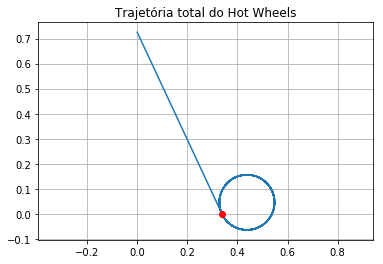

In [22]:
xtotal = []
ytotal = []

for i in range(0,len(tempo)):
    if(solucaoRampa[:,1][i]>=0):
        xtotal.append(solucaoRampa[:,0][i])
        ytotal.append(solucaoRampa[:,1][i])
        
for i in range(0,len(tempo)):
    xtotal.append(xloop[i] + Xmax + R_do_loop*math.sin(ang))
    ytotal.append(yloop[i] + R_do_loop*math.cos(ang)) 


plt.plot(xtotal, ytotal)
plt.plot(Xmax,0, 'ro')
plt.axis('equal')
plt.grid(True)
plt.title('Trajetória total do Hot Wheels')
plt.show()

In [ ]:
#código para ver o comportamento da força Normal no percurso

def CaiuOuNao(solucaoLoop):
    
    ListaN=[]
    for i in range(0, len(tempo)):z
        a = (solucaoLoop[:,0])[i]
        w = (solucaoLoop[:,1])[i]     
        N=m*w**2*R_do_loop-m*g*math.sin(a)
        ListaN.append(N)    
    
    for i, N in enumerate(ListaN):
        if N < 0:
            Caiu=True
            break
        if i == len(ListaN)-1:
            Caiu=False
    return Caiu
   
    
    
    


In [ ]:
if CaiuOuNao(solucaoLoop) is True:
    print("O carrinho cai com ângulo %.1f" %math.degrees(ang))
else:
    print("O carrinho não cai com ângulo %.1f" %math.degrees(ang))